In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
from tensorflow.keras.datasets import cifar10

(x, y), (x_test, y_test)= cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
# Normalizing

x= x.astype('float32') / 255.0            # float32 int type provide higher precision for calclutions
x_test= x_test.astype('float32') / 255.0

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [30]:
# Importing Necessary Libraries

from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [31]:
# Loading Pretrained-Weights of Resnet50

resnet_50 = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
# resnet_50.trainable = False
resnet_50.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [32]:
# Loading

num_of_classes= len(class_names)

model= models.Sequential()

# Here we have 3 Up-Sampling layers which increase the size of the image from 32X32 to 256X256 (8 times)
# This was done so that you dont have to store all the resized data in one place (That might cause unnecessary memory alloc error)
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))

# Loading trained weights
model.add(resnet_50)

# Flattening to feed into Hidden layers
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

# Output layer
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [34]:
# Training the model

from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer=optimizers.RMSprop(learning_rate=5e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

history= model.fit(x, y, validation_split=0.1, epochs=5)

# Saving the model
_m_='cifar_resnet50_3.keras'
model.save(_m_)
from google.colab import files
files.download('cifar_resnet50_3.keras')

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 534s 346ms/step - acc: 0.5270 - loss: 1.4575 - val_acc: 0.9034 - val_loss: 0.3914
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 511s 325ms/step - acc: 0.8385 - loss: 0.6390 - val_acc: 0.9238 - val_loss: 0.2726
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 508s 330ms/step - acc: 0.9081 - loss: 0.4071 - val_acc: 0.9344 - val_loss: 0.2358
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 502s 329ms/step - acc: 0.9418 - loss: 0.2829 - val_acc: 0.9350 - val_loss: 0.2281
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 464s 330ms/step - acc: 0.9578 - loss: 0.2103 - val_acc: 0.9454 - val_loss: 0.2088


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

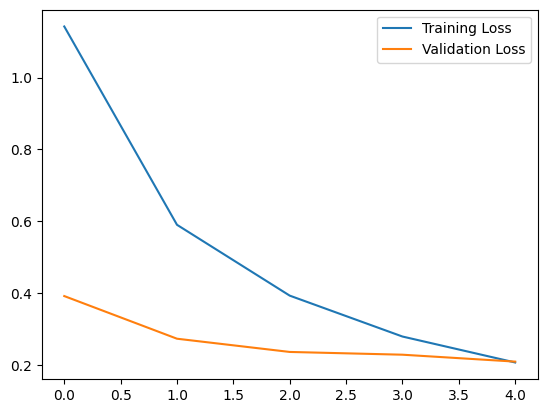

In [46]:
# Plot training/validation loss and accuracy:

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [36]:
from tensorflow import keras

_m_='cifar_resnet50_3.keras'
# Load the saved model
model= keras.models.load_model(_m_)

y_pred= model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 102ms/step


In [37]:
# Test Accuracy

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 97ms/step - acc: 0.9395 - loss: 0.2290
Test Accuracy: 0.9407


In [38]:
# Precision, Recall & F1-Score

from sklearn.metrics import (
            precision_score, recall_score, f1_score)

precision= precision_score(y_test, y_pred_classes, average='macro')
recall= recall_score(y_test, y_pred_classes, average='macro')
f1= f1_score(y_test, y_pred_classes, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.9411
Recall: 0.9407
F1-Score: 0.9408


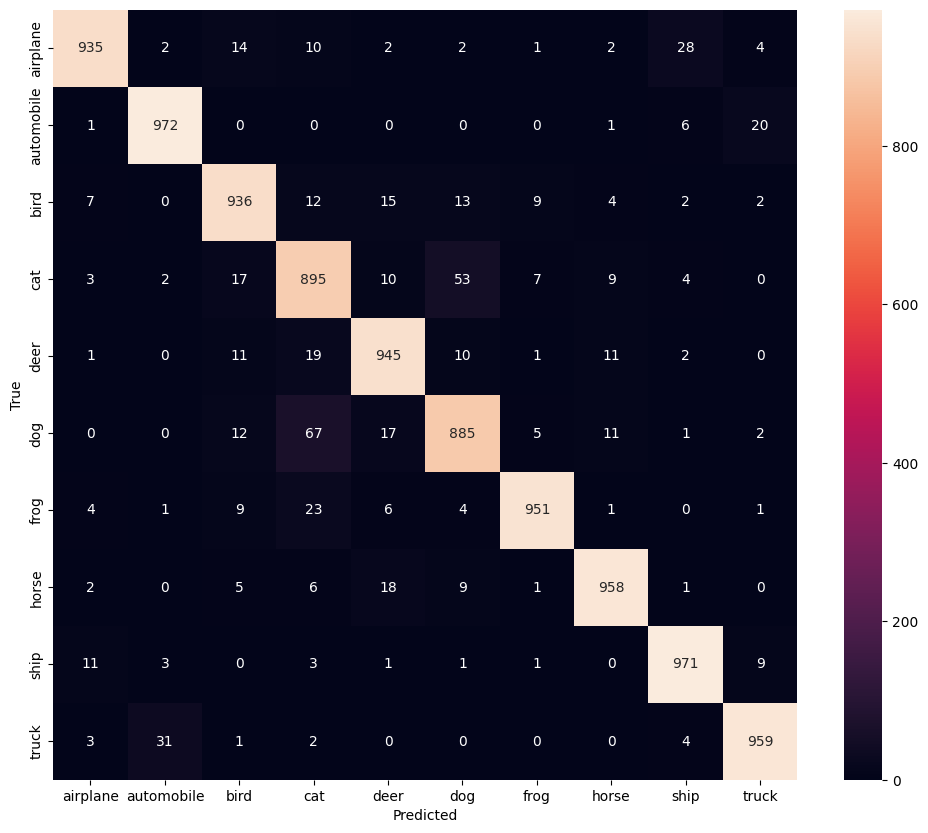

In [48]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm= confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# plt.savefig('confusion_Matrix(resnet).png')
# from google.colab import files
# files.download('confusion_Matrix(resnet).png')

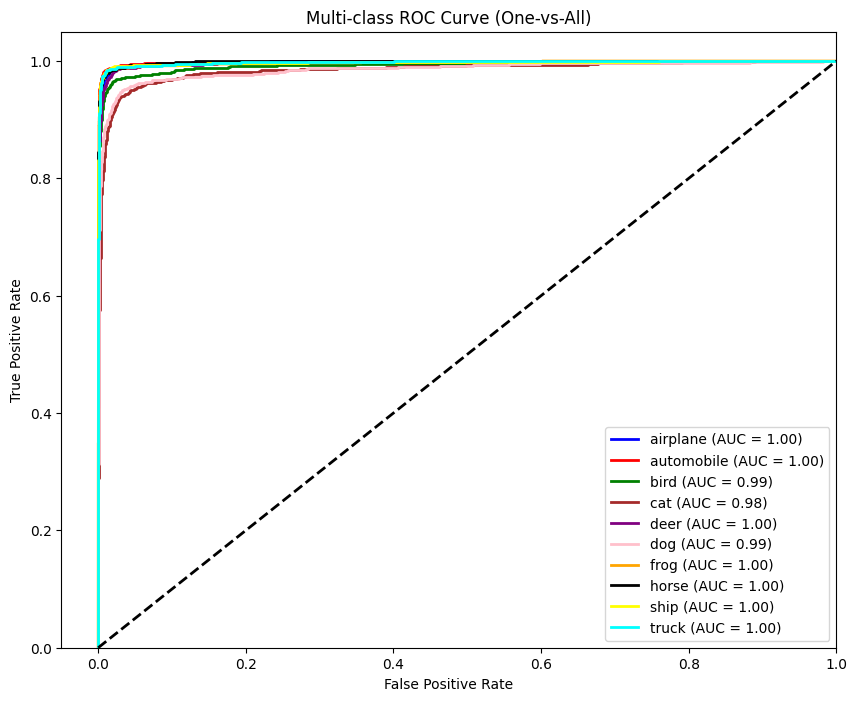

In [49]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output
y_test_bin= label_binarize(y_test, classes=range(10))
y_pred_bin = y_pred  # Already probability outputs

# Compute ROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:,i], y_pred_bin[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10,8))
colors = cycle(['blue', 'red', 'green', 'brown', 'purple',
               'pink', 'orange', 'black', 'yellow', 'cyan'])

for i, color, class_name in zip(range(10), colors, class_names):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{0} (AUC = {1:0.2f})'
             .format(class_name, roc_auc[i]))

plt.plot([0,1],[0,1],'k--', lw=2)
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve (One-vs-All)')
plt.legend(loc="lower right")
plt.show()
# plt.savefig('ROC_Curve(resnet).png')
# from google.colab import files
# files.download('ROC_Curve(resnet).png')